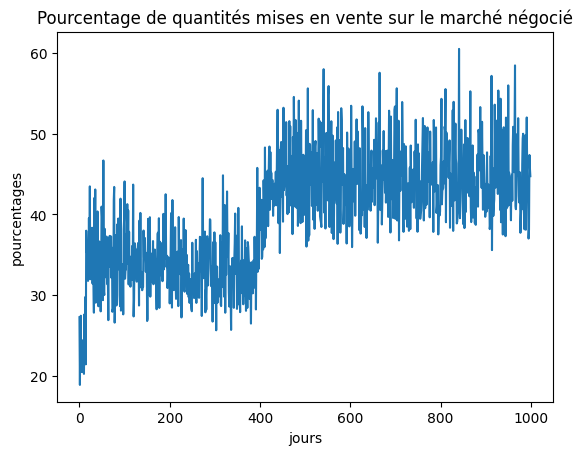

In [5]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

class marché():
    def __init__(self,prix_a,prix_n):
        self.prix_a=prix_a
        self.prix_n=prix_n
    
    def revision_vend(self,p_t,offre_1_t,offre_2_t,demande,coeff=0.1):
        offre=offre_1_t+offre_2_t
        p=[]
        D_sum_r=sum(demande[0])
        D_sum_c=sum(demande[1])
        for i in range(200):
            P_r=p_t[i][0]*(1+coeff*np.tanh(D_sum_r/offre[i][0]-1))    
            P_c=p_t[i][1]*(1+coeff*np.tanh(D_sum_c/offre[i][1]-1))
            p.append((P_r,P_c))
        return(p)

    def profit_t(self,p_t,offre_1_t,offre_2_t):
        offre=offre_1_t+offre_2_t
        profit=[]
        for i in range(len(p_t)):
            p_1=offre[i][1]*p_t[i][1]+offre[i][0]*p_t[i][0]            
            profit.append(p_1)
        return(profit)

    def rapports_t(self,p_t_n,offre_1_t,offre_2_t):
        profits_n=self.profit_t(p_t_n,offre_1_t,offre_2_t)
        profits_a=self.profit_t(self.prix_a,offre_1_t,offre_2_t)
        R=[]
        for i in range (200):
            r=(profits_a[i]-profits_n[i])/(profits_a[i]+profits_n[i])
            R.append(r)
        return(R)

    def marchés_t(self,R_t):
        marchés=[]
        for r in R_t:
            if r==-1:
                marchés.append("négocié")
            elif r<-0.5:
                marchés.append(Ber(0.25))
            elif r<=0:
                marchés.append(Ber(0.5))
            elif r<0.5:
                marchés.append(Ber(0.75))
            else:
                marchés.append("enchere")
        return(marchés)

    def offre_en_négocié(self,marchés,offre_1_t,offre_2_t):
        offre=offre_1_t+offre_2_t
        S=0
        for i in range (200):
            if marchés[i]=="négocié":
                S+=offre[i][0]+offre[i][1]
        return S
    
def Ber(param):
    x=rd.random()   
    if x<param:
        return("enchere")   
    return("négocié") 


# test
prix_n=[(2.82,5.38)]*200
prix_a=[(2.76,4.85)]*200
ma=marché(prix_n,prix_a)
pourcentages=[]
for i in range (1000):
    offre_1_t=[(rd.randint(100,200),rd.randint(50,100))for i in range(100)]
    offre_2_t=[(rd.randint(50,100),rd.randint(200,400))for i in range(100)]
    demande=[(rd.randint(200,400),rd.randint(150,400)) for i in range(100)]
    total=sum(offre_2_t[0])+sum(offre_2_t[1])+sum(offre_1_t[0])+sum(offre_2_t[1])
    R_t=ma.rapports_t(prix_n,offre_1_t,offre_2_t)
    marchés=ma.marchés_t(R_t)
    offre_n=ma.offre_en_négocié(marchés,offre_1_t,offre_2_t)
    pourcentage_n=offre_n/total
    pourcentages.append(pourcentage_n)
    prix_n=ma.revision_vend(prix_n,offre_1_t,offre_2_t,demande,coeff=0.1)
    
plt.plot([i for i in range(1000)],pourcentages)
plt.xlabel("jours")
plt.ylabel("pourcentages")
plt.title("Pourcentage de quantités mises en vente sur le marché négocié")
plt.show()